In [2]:
# import python libraries for the EDA process

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objs as go
import plotly
import datetime

1. Exploring the Dataset

In this section we will analyze the dataset, understand the field names and data types, perform other analysis like NA or Null Values.


In [3]:
cab_data = pd.read_csv(r'C:\Users\schou\Downloads\DataSets-main\DataSets-main\Cab_Data.csv')
missing_value = 0
for column in cab_data.columns :
    missing_value += cab_data[column].isna().sum() + cab_data[column].isnull().sum()
print ('Cab_Data has {} entries, {} attributes and {} missing values'. format(cab_data.shape[0], cab_data.shape[1], missing_value))
print ('\nDatatypes of the attributes :\n\n{}'. format(cab_data.dtypes))
cab_data.head(5)

Cab_Data has 359392 entries, 7 attributes and 0 missing values

Datatypes of the attributes :

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,1/7/2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,1/3/2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
city_data = pd.read_csv(r'C:\Users\schou\Downloads\DataSets-main\DataSets-main\City.csv')
missing_value = 0
for column in city_data.columns :
    missing_value += city_data[column].isna().sum() + city_data[column].isnull().sum()
print ('City has {} entries, {} attributes and {} missing values'. format(city_data.shape[0], city_data.shape[1], missing_value))
print ('\nDatatypes of the attributes :\n\n{}'. format(city_data.dtypes))
city_data.head(5)

City has 20 entries, 3 attributes and 0 missing values

Datatypes of the attributes :

City          object
Population    object
Users         object
dtype: object


,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [5]:
customer_id = pd.read_csv(r'C:\Users\schou\Downloads\DataSets-main\DataSets-main\Customer_ID.csv')
missing_value = 0
for column in customer_id.columns :
    missing_value += customer_id[column].isna().sum() + customer_id[column].isnull().sum()
print ('Customer_ID has {} entries, {} attributes and {} missing values'. format(customer_id.shape[0], customer_id.shape[1], missing_value))
print ('\nDatatypes of the attributes :\n\n{}'. format(customer_id.dtypes))
customer_id.head(5)

Customer_ID has 49171 entries, 4 attributes and 0 missing values

Datatypes of the attributes :

Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [6]:
transaction_id = pd.read_csv(r'C:\Users\schou\Downloads\DataSets-main\DataSets-main\Transaction_ID.csv')
missing_value = 0
for column in transaction_id.columns :
    missing_value += transaction_id[column].isna().sum() + transaction_id[column].isnull().sum()
print ('Transaction_ID has {} entries, {} attributes and {} missing values'. format(transaction_id.shape[0], transaction_id.shape[1], missing_value))
print ('\nDatatypes of the attributes :\n\n{}'. format(transaction_id.dtypes))
transaction_id.head(5)

Transaction_ID has 440098 entries, 3 attributes and 0 missing values

Datatypes of the attributes :

Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Merging all Dataset into Master Dataset

In [7]:
Master_data = cab_data.merge(transaction_id, on = 'Transaction ID').merge(customer_id, on = 'Customer ID').merge(city_data, on = 'City')
missing_value = 0
for column in Master_data.columns :
    missing_value += Master_data[column].isna().sum() + Master_data[column].isnull().sum()
print('Master Data has {} entries, {} attributes and {} missing values'. format(Master_data.shape[0], Master_data.shape[1], missing_value))
print('\nDatatypes of the attributes :\n\n{}'. format(Master_data.dtypes))
Master_data.head(10)
         

Master Data has 359392 entries, 14 attributes and 0 missing values

Datatypes of the attributes :

Transaction ID          int64
Date of Travel         object
Company                object
City                   object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Customer ID             int64
Payment_Mode           object
Gender                 object
Age                     int64
Income (USD/Month)      int64
Population             object
Users                  object
dtype: object


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,"814,885","24,701"
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,"814,885","24,701"
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,"814,885","24,701"
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,"814,885","24,701"
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,"814,885","24,701"
5,10324737,5/4/2018,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,"814,885","24,701"
6,10395626,10/27/2018,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,"814,885","24,701"
7,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,"814,885","24,701"
8,10079404,9/21/2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,"814,885","24,701"
9,10186994,6/23/2017,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,"814,885","24,701"



2. Data Cleaning


In [8]:
for column in ["Population", "Users"] :
    Master_data[column] = Master_data[column].str.replace(',', '')
Master_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,1/8/2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,7/21/2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,11/23/2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701
3,10000012,1/6/2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701
4,10320494,4/21/2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701
5,10324737,5/4/2018,Yellow Cab,ATLANTA GA,6.18,138.40,87.5088,27703,Cash,Male,27,9237,814885,24701
6,10395626,10/27/2018,Pink Cab,ATLANTA GA,13.39,167.03,141.9340,27703,Card,Male,27,9237,814885,24701
7,10000013,1/2/2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,814885,24701
8,10079404,9/21/2016,Yellow Cab,ATLANTA GA,39.60,704.30,494.2080,28712,Card,Male,53,11242,814885,24701
9,10186994,6/23/2017,Yellow Cab,ATLANTA GA,18.19,365.63,246.6564,28712,Card,Male,53,11242,814885,24701


In [9]:
Master_data['Date of Travel'] = pd.to_datetime(Master_data['Date of Travel'])

for column in ["Company", "City", "Payment_Mode", "Gender"] :
    Master_data[column] = Master_data[column].astype('category')
    
for column in ["Population", "Users"] :
    Master_data[column] = Master_data[column].astype('int64')
    
Master_data.dtypes

Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                     category
City                        category
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                category
Gender                      category
Age                            int64
Income (USD/Month)             int64
Population                     int64
Users                          int64
dtype: object

2. Statistical Analysis

<AxesSubplot:xlabel='Income (USD/Month)', ylabel='Count'>

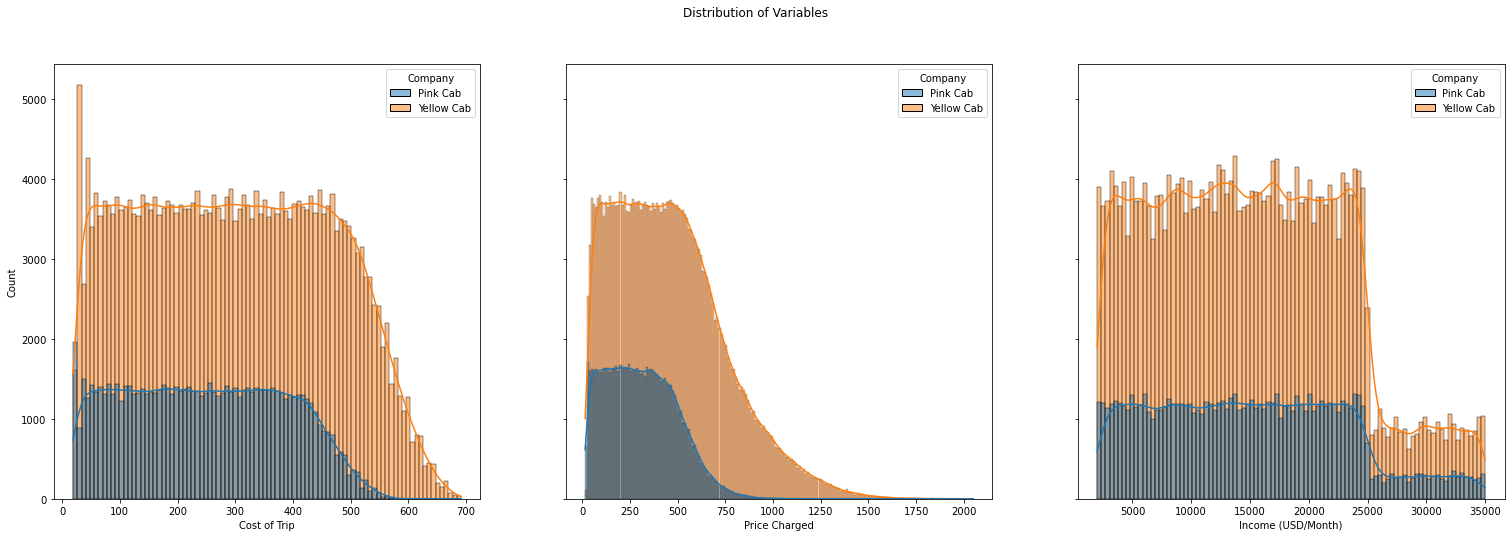

In [13]:
# The KDE Curves and Distribution plots of selected variables with respect to Cab Companies

fig,axes = plt.subplots(1, 3, figsize = (26,8), sharey = True)
fig.suptitle("Distribution of Variables")
sns.histplot(ax=axes[0], data = Master_data, x='Cost of Trip', kde = True, hue = "Company")
sns.histplot(ax=axes[1], data = Master_data, x='Price Charged', kde = True, hue = "Company")
sns.histplot(ax=axes[2], data = Master_data, x='Income (USD/Month)', kde = True, hue = "Company")

<AxesSubplot:xlabel='Age', ylabel='Count'>

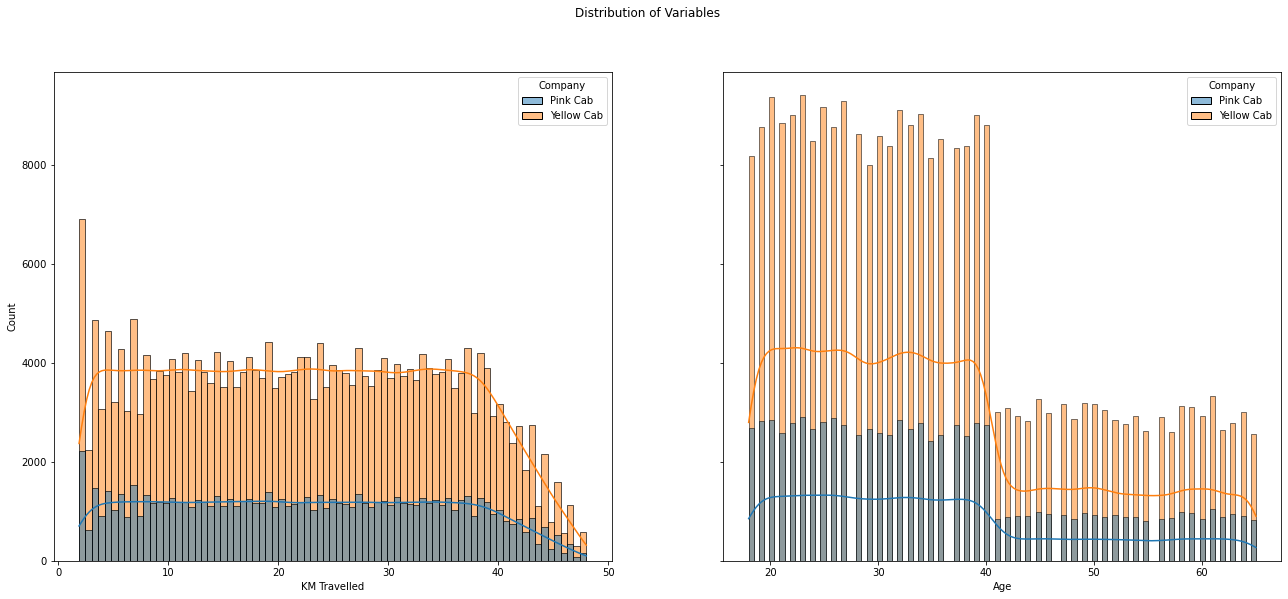

In [15]:
# The KDE Curves and Distribution plots of selected variables with respect to Cab Companies

fig,axes = plt.subplots(1, 2, figsize = (22,9), sharey = True)
fig.suptitle("Distribution of Variables")
sns.histplot(ax=axes[0], data = Master_data, x='KM Travelled', kde = True, hue = "Company")
sns.histplot(ax=axes[1], data = Master_data, x='Age', kde = True, hue = "Company")

<AxesSubplot:xlabel='Users', ylabel='Count'>

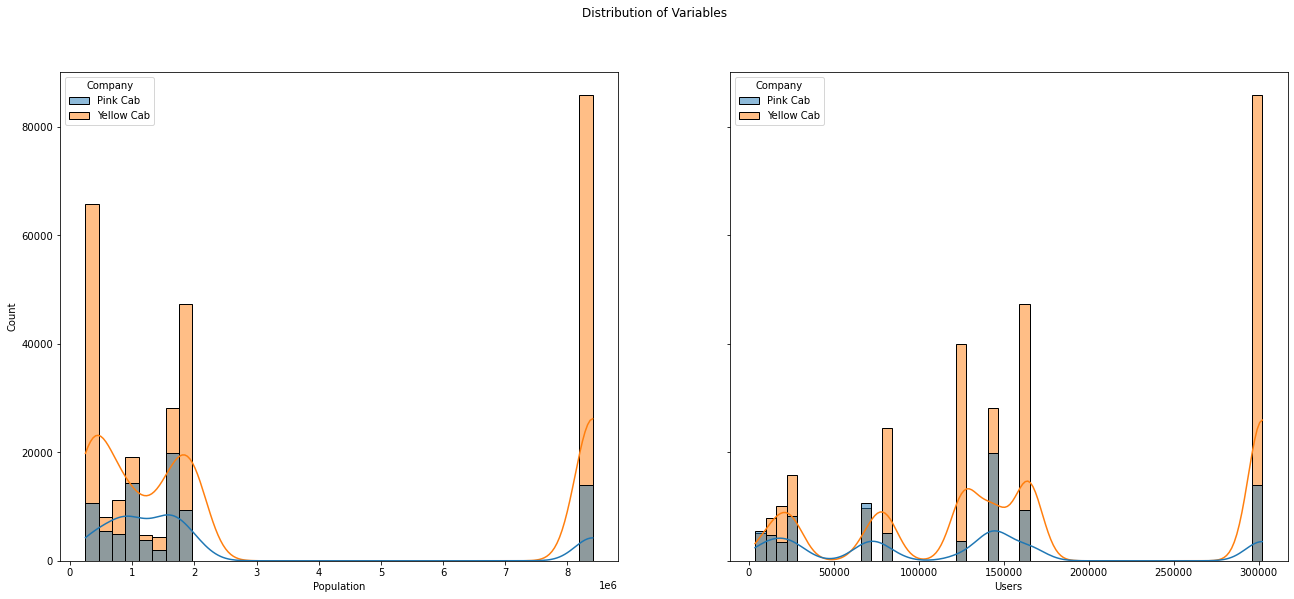

In [16]:
# The KDE Curves and Distribution plots of selected variables with respect to Cab Companies

fig,axes = plt.subplots(1, 2, figsize = (22,9), sharey = True)
fig.suptitle("Distribution of Variables")
sns.histplot(ax=axes[0], data = Master_data, x='Population', kde = True, hue = "Company")
sns.histplot(ax=axes[1], data = Master_data, x='Users', kde = True, hue = "Company")

In [19]:
# splitting and filtering Masterdata into two dataset to analyze them individually

Pink_MD = Master_data[Master_data['Company'] == 'Pink Cab']
Yellow_MD = Master_data[Master_data['Company'] == 'Yellow Cab']
Selected_columns = ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', 'Income (USD/Month)', 'Population', 'Users']
Filtered_Pink_MD = Pink_MD[Selected_columns]
Filtered_Yellow_MD = Yellow_MD[Selected_columns]

#statistical info of the filtered Pink Cab Dataset

Pink_Cab_Stats = Filtered_Pink_MD.describe()
Pink_Cab_Stats

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
count,84711.000000,84711.000000,84711.000000,84711.000000,84711.000000,8.471100e+04,84711.000000
mean,22.559917,310.800856,248.148682,35.322414,15059.047137,2.350642e+06,125590.813330
std,12.231092,181.995661,135.403345,12.644780,7991.077762,2.734890e+06,94593.433659
min,1.900000,15.600000,19.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,12.000000,159.970000,131.868000,25.000000,8371.000000,8.148850e+05,27247.000000
50%,22.440000,298.060000,246.330000,33.000000,14713.000000,1.595037e+06,144132.000000
75%,32.960000,441.505000,360.180000,42.000000,21055.000000,1.955130e+06,164468.000000
max,48.000000,1623.480000,576.000000,65.000000,35000.000000,8.405837e+06,302149.000000


In [20]:
#statistical info of the filtered Yellow Cab Dataset

Yellow_Cab_Stats = Filtered_Yellow_MD.describe()
Yellow_Cab_Stats

,KM Travelled,Price Charged,Cost of Trip,Age,Income (USD/Month),Population,Users
count,274681.000000,274681.000000,274681.000000,274681.000000,274681.000000,2.746810e+05,274681.000000
mean,22.569517,458.181990,297.922004,35.341112,15045.669817,3.373228e+06,168473.246981
std,12.234298,288.386166,162.548986,12.578625,7962.727062,3.439014e+06,100570.558886
min,1.900000,20.730000,22.800000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,11.990000,226.680000,158.400000,25.000000,8439.000000,6.712380e+05,80021.000000
50%,22.440000,425.060000,295.596000,33.000000,14676.000000,1.595037e+06,144132.000000
75%,32.960000,633.880000,432.432000,42.000000,21023.000000,8.405837e+06,302149.000000
max,48.000000,2048.030000,691.200000,65.000000,34996.000000,8.405837e+06,302149.000000


<AxesSubplot:>

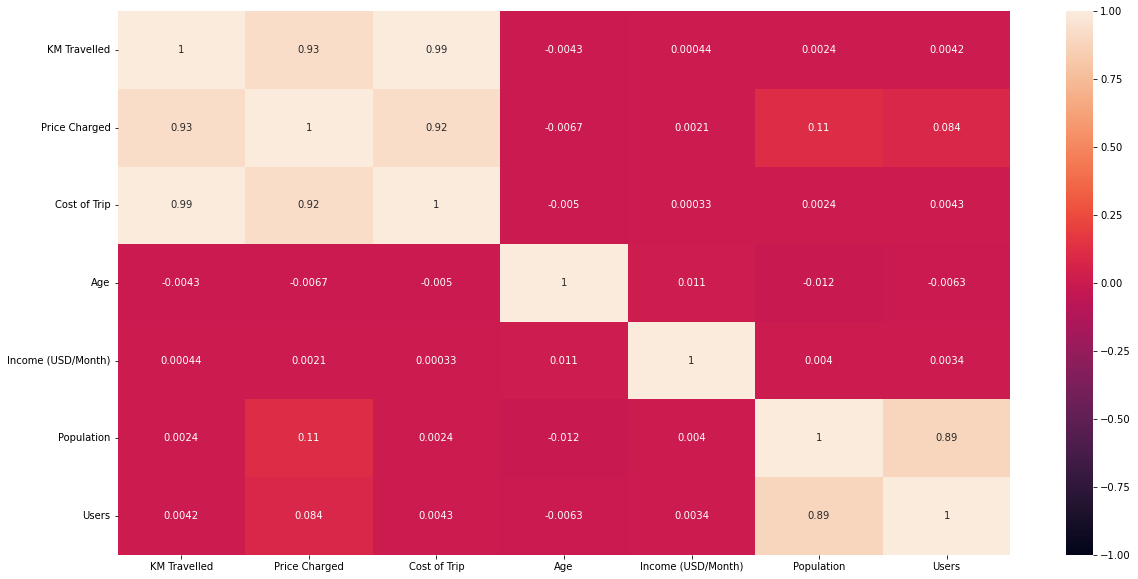

In [23]:
# Correlation of Filtered Master Data by Heatmap for Pink Cab

Pink_Cab_Corr = Filtered_Pink_MD.corr()
plt.figure(figsize = (20,10))
sns.heatmap(Pink_Cab_Corr, annot = True, vmin = -1, vmax = 1, )

<AxesSubplot:>

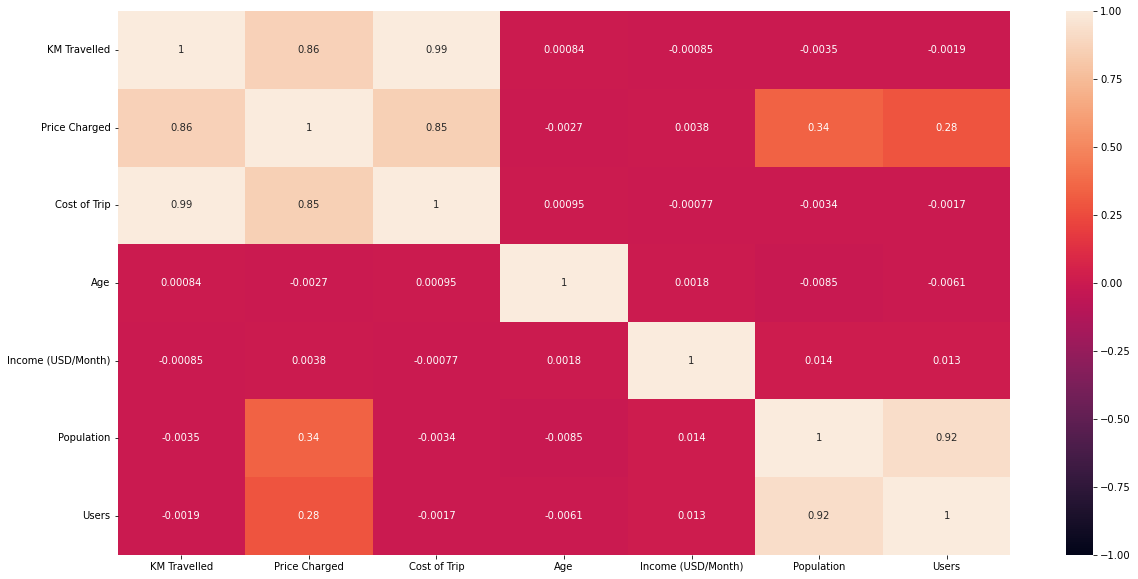

In [24]:
# Correlation of Filtered Master Data by Heatmap for Yellow Cab

Yellow_Cab_Corr = Filtered_Yellow_MD.corr()
plt.figure(figsize = (20,10))
sns.heatmap(Yellow_Cab_Corr, annot = True, vmin = -1, vmax = 1, )

Text(0.5, 1.0, 'KM Travelled - Price Charged')

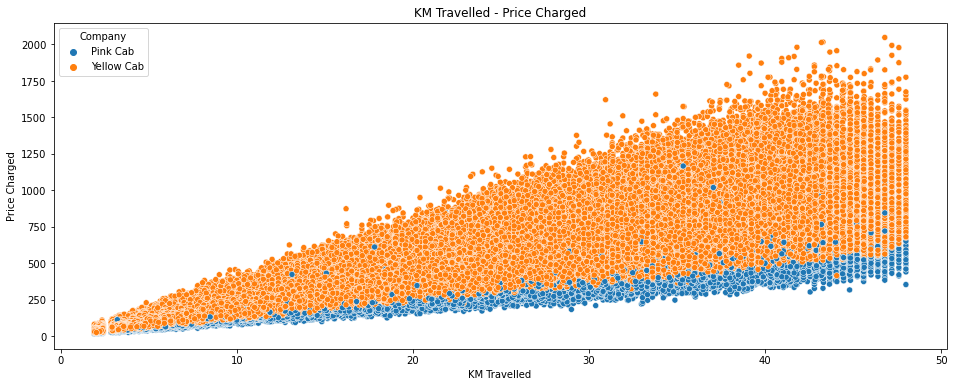

In [28]:
# Scatter plot of Master Data to see any existing correlation between them

fig,axes = plt.subplots(figsize = (16,6), sharey = True)
sns.scatterplot(data = Master_data, x='KM Travelled', y='Price Charged', hue='Company').set_title("KM Travelled - Price Charged")


Text(0.5, 1.0, 'KM Travelled - Cost of Trip')

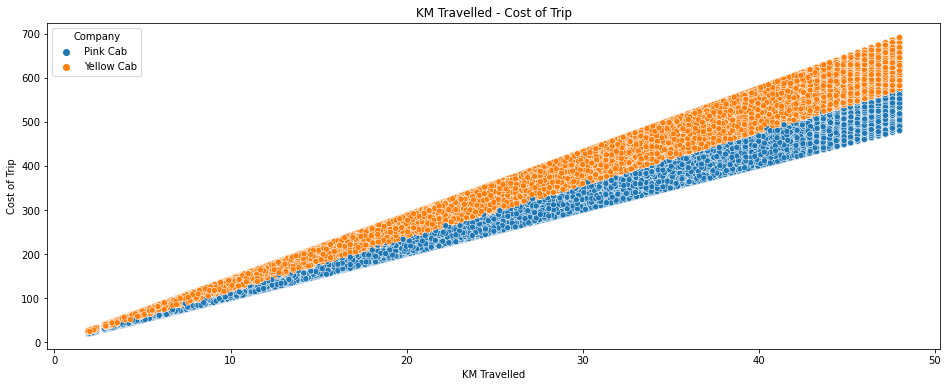

In [29]:
fig,axes = plt.subplots(figsize = (16,6), sharey = True)
sns.scatterplot(data = Master_data, x='KM Travelled', y='Cost of Trip', hue='Company').set_title("KM Travelled - Cost of Trip")


Text(0.5, 1.0, 'Price Charged - Cost of Trip')

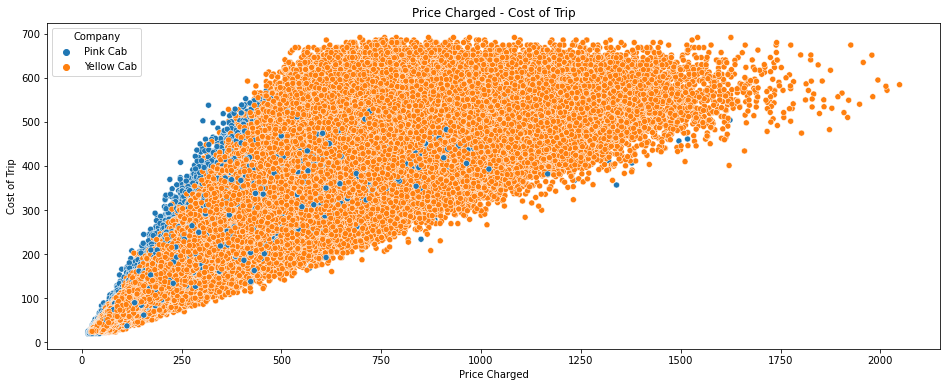

In [30]:
fig,axes = plt.subplots(figsize = (16,6), sharey = True)
sns.scatterplot(data = Master_data, x='Price Charged', y='Cost of Trip', hue='Company').set_title("Price Charged - Cost of Trip")


Text(0.5, 1.0, 'Population - Users')

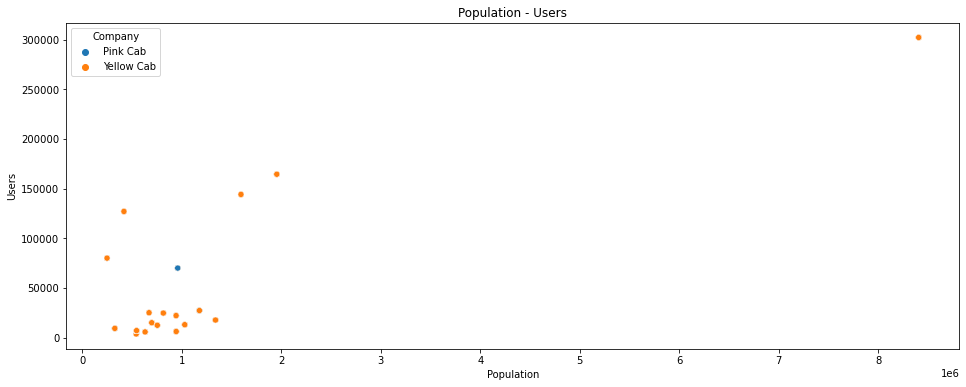

In [31]:
fig,axes = plt.subplots(figsize = (16,6), sharey = True)
sns.scatterplot(data = Master_data, x='Population', y='Users', hue='Company').set_title("Population - Users")


Text(0.5, 1.0, 'Users - Price Charged')

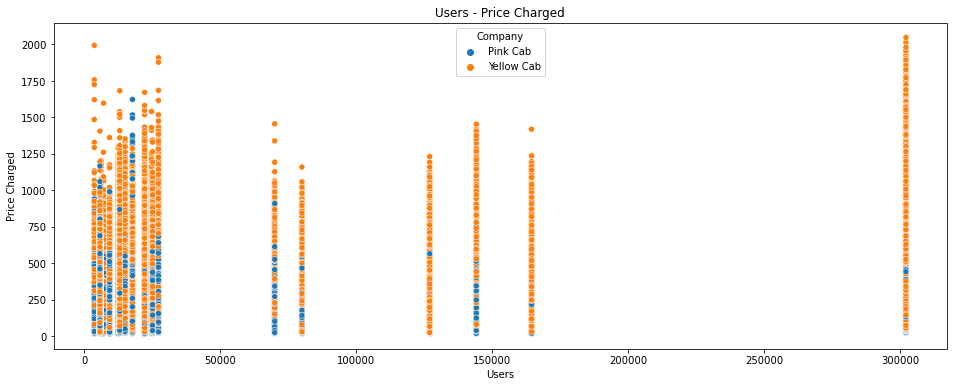

In [32]:
fig,axes = plt.subplots(figsize = (16,6), sharey = True)
sns.scatterplot(data = Master_data, x='Users', y='Price Charged', hue='Company').set_title("Users - Price Charged")


Text(0.5, 1.0, 'Population - Price Charged')

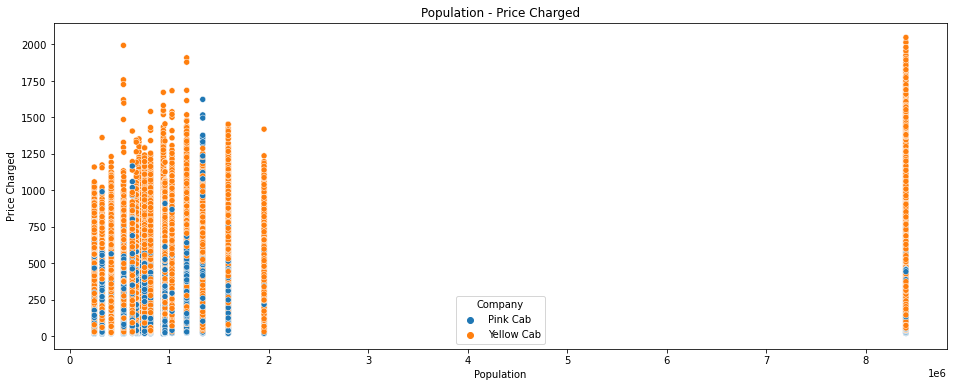

In [33]:
fig,axes = plt.subplots(figsize = (16,6), sharey = True)
sns.scatterplot(data = Master_data, x='Population', y='Price Charged', hue='Company').set_title("Population - Price Charged")


In [36]:
# Validating with Pearson Correlation Coefficients

pcorr_coeff1 = stats.pearsonr(Master_data['KM Travelled'], Master_data['Price Charged'])
pcorr_coeff2 = stats.pearsonr(Master_data['KM Travelled'], Master_data['Cost of Trip'])
pcorr_coeff3 = stats.pearsonr(Master_data['Price Charged'], Master_data['Cost of Trip'])
pcorr_coeff4 = stats.pearsonr(Master_data['Population'], Master_data['Users'])
pcorr_coeff5 = stats.pearsonr(Master_data['Population'], Master_data['Price Charged'])
pcorr_coeff6 = stats.pearsonr(Master_data['Users'], Master_data['Price Charged'])

print('pearson correlation coefficient for  KM Travelled - Price Charged : '+ str(pcorr_coeff1))
print('pearson correlation coefficient for  KM Travelled - Cost of Trip : '+ str(pcorr_coeff2))
print('pearson correlation coefficient for  Price Charged - Cost of Trip : '+ str(pcorr_coeff3))
print('pearson correlation coefficient for  Population - Users : '+ str(pcorr_coeff4))
print('pearson correlation coefficient for  Population - Price Charged : '+ str(pcorr_coeff5))
print('pearson correlation coefficient for  Users - Price Charged : '+ str(pcorr_coeff6))

pearson correlation coefficient for  KM Travelled - Price Charged : (0.8357531580209405, 0.0)
pearson correlation coefficient for  KM Travelled - Cost of Trip : (0.9818483823189957, 0.0)
pearson correlation coefficient for  Price Charged - Cost of Trip : (0.8598117262915665, 0.0)
pearson correlation coefficient for  Population - Users : (0.9154903444757243, 0.0)
pearson correlation coefficient for  Population - Price Charged : (0.32658917101926543, 0.0)
pearson correlation coefficient for  Users - Price Charged : (0.28106053569191203, 0.0)


From the statistical analysis we found out that there is a strong relationship between KM Travelled - Price Charged, KM Travelled - Cost of Trip, Price Charged - Cost of Trip, Population - Users

3. Inferential Data Analysis

Here we will analyze the Master Data to make a decision regarding which company will be the best for investment through the data analysis and visualization of different aspects

In [39]:
Total_User = Master_data.groupby("Company").count()
Fig1 = px.pie(Total_User, values = Total_User.Users, names = Total_User.index, title = "Total Users of Pink and Yellow Cab Firms")
Fig1.update_traces(textposition = 'inside', textinfo = 'percent+label')
Fig1.update_layout(width = 1100, height = 600)

The total number of Yellow Cab users is 3 times that of Pink Cab

In [40]:
Pink_City_Count = Master_data[Master_data["Company"] == "Pink Cab"].groupby("City").count()
Yellow_City_Count = Master_data[Master_data["Company"] == "Yellow Cab"].groupby("City").count()
fig = go.Figure()
fig.add_trace(go.Bar(x=Pink_City_Count.index, y=Pink_City_Count['Users'], name = "Pink Cab", marker_color = "pink"))
fig.add_trace(go.Bar(x=Yellow_City_Count.index, y=Yellow_City_Count['Users'], name = "Yellow Cab", marker_color = "yellow"))
fig.update_layout(yaxis_title = "Users", title = "Cabs Distribution over Cities")

In [46]:
Master_data["Profit_of_Trip"] = Master_data["Price Charged"] - Master_data["Cost of Trip"]

Pink_Data = Master_data[Master_data['Company'] == 'Pink Cab']
Yellow_Data = Master_data[Master_data['Company'] == 'Yellow Cab']

dict1 = {"Pink Cab" : [Pink_Data["Profit_of_Trip"].sum()], "Yellow Cab" : [Yellow_Data["Profit_of_Trip"].sum()]}
Profit_df = pd.DataFrame(dict1).T

Fig1 = px.pie(Profit_df, values = Profit_df[0], names = Profit_df.index, title = "Profit of Pink and Yellow Cab Firms")
Fig1.update_traces(textposition = 'inside', textinfo = 'percent+label')
Fig1.update_layout(width = 1100, height = 600)

In [47]:
City_Profit = Master_data.groupby("City").sum()
Fig1 = px.pie(City_Profit, values = City_Profit.Profit_of_Trip, names = City_Profit.index, title = "Profit Shares of Cities")
Fig1.update_traces(textposition = 'inside', textinfo = 'percent+label')
Fig1.update_layout(width = 1100, height = 600)

In [48]:
Gender_data = Master_data.groupby("Gender").count()
Fig1 = px.pie(Gender_data, values = Gender_data.Users, names = Gender_data.index, title = "Gender Overview")
Fig1.update_traces(textposition = 'inside', textinfo = 'percent+label')
Fig1.update_layout(width = 1100, height = 600)

In [49]:
Pink_City_Gender = Master_data[Master_data["Company"] == "Pink Cab"].groupby("Gender").count()
Yellow_City_Gender = Master_data[Master_data["Company"] == "Yellow Cab"].groupby("Gender").count()
fig = go.Figure()
fig.add_trace(go.Bar(x=Pink_City_Gender.index, y=Pink_City_Gender['Users'], name = "Pink Cab", marker_color = "pink"))
fig.add_trace(go.Bar(x=Yellow_City_Gender.index, y=Yellow_City_Gender['Users'], name = "Yellow Cab", marker_color = "yellow"))
fig.update_layout(yaxis_title = "Users", title = "Cabs Distribution over Gender")

In [51]:
KMtravelled_data = Master_data.groupby("Company")["KM Travelled"].sum()
KMtravelled_data = pd.DataFrame(KMtravelled_data)
Fig1 = px.pie(KMtravelled_data, values = KMtravelled_data["KM Travelled"], names = KMtravelled_data.index, title = "KM Travelled Overview")
Fig1.update_traces(textposition = 'inside', textinfo = 'percent+label')
Fig1.update_layout(width = 1100, height = 600)

In [52]:
KMtravelled_data1 = Master_data.groupby("City")["KM Travelled"].sum()
KMtravelled_data1 = pd.DataFrame(KMtravelled_data1)
Fig1 = px.pie(KMtravelled_data1, values = KMtravelled_data1["KM Travelled"], names = KMtravelled_data1.index, title = "KM Travelled Overview by Cities")
Fig1.update_traces(textposition = 'inside', textinfo = 'percent+label')
Fig1.update_layout(width = 1100, height = 600)

In [54]:
Master_data['Year_of_Travel'] = Master_data['Date of Travel'].dt.year
Master_data['Month_of_Travel'] = Master_data['Date of Travel'].dt.month
Master_data['Day_of_Travel'] = Master_data['Date of Travel'].dt.day

years_list = ["2016","2017","2018"]

def year_pink():
    
    
    
    profit_2016 = round ( Master_data[(Master_data['Year_of_Travel'] == 2016) & (Master_data.Company == "Pink Cab")]["Profit_of_Trip"].sum() ,2)
    profit_2017 = round ( Master_data[(Master_data['Year_of_Travel'] == 2017) & (Master_data.Company == "Pink Cab")]["Profit_of_Trip"].sum() ,2)
    profit_2018 = round ( Master_data[(Master_data['Year_of_Travel'] == 2018) & (Master_data.Company == "Pink Cab")]["Profit_of_Trip"].sum() ,2)
    
    profits = [profit_2016, profit_2017, profit_2018]
    
    return profits

def year_yellow():
    
    
    
    profit_2016 = round ( Master_data[(Master_data['Year_of_Travel'] == 2016) & (Master_data.Company == "Yellow Cab")]["Profit_of_Trip"].sum() ,2)
    profit_2017 = round ( Master_data[(Master_data['Year_of_Travel'] == 2017) & (Master_data.Company == "Yellow Cab")]["Profit_of_Trip"].sum() ,2)
    profit_2018 = round ( Master_data[(Master_data['Year_of_Travel'] == 2018) & (Master_data.Company == "Yellow Cab")]["Profit_of_Trip"].sum() ,2)
    
    profits = [profit_2016, profit_2017, profit_2018]
    
    return profits


yellow = year_yellow()
pink = year_pink()
zippedy = zip(yellow,years_list)
zippedp = zip(pink,years_list)

datap = pd.DataFrame(zippedp,columns=["Profit","Year"])
datay = pd.DataFrame(zippedy,columns=["Profit","Year"])

fig = go.Figure()
fig.add_trace(go.Scatter(x=datay.Year, y=datay.Profit,
                    mode='lines+markers',
                    name='Yellow Cab'
                    ))
fig.add_trace(go.Scatter(x=datap.Year, y=datap.Profit,
                    mode='lines+markers',
                    name='Pink Cab'
                     ))
fig.update_layout(
    title="Total Profit per year by Cab Firm",
    xaxis_title="Years",
    yaxis_title="Profits",
    legend_title="Cab Companies",
)

fig.show()